# Project: Neural Networks for Handwritten Digit Recognition(Multiclass)

# Problem Statement

Use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected.

# Outline
- [1 - Packages](#1)
- [2 - Dataset](#2)
  - [2.1 View the variables](#2.1)
  - [2.2 Visualizing the Data](#2.2)
  - [2.3 Class Distribution Overview](#2.3)
- [3 - Neural Networks](#3)
  - [3.1 Split the Data](#3.1)
  - [3.2 Building the Neural Network Model](#3.2)
  - [3.3 Hyperparameter Tuning](#3.3)
  - [3.4 Retrieve the best model configuration](#3.4)
  - [3.5 Evaluating Model Performance](#3.5)
  - [3.6 Check Misclassified Examples](#3.6)


<a name="1"></a>
## 1 - Packages

Import packages.

In [5]:
# Install ipympl
!pip install ipympl

# Optionally, use JS to automatically trigger the restart
from IPython.display import Javascript
display(Javascript('google.colab.kernel.restart()'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.4 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
file_path = "/content/drive/MyDrive/Coursera/Course Recording/Machine Learning Specialization/2. Advanced Learning Algorithms/Week 2/6. Practice Lab: Neural network training/Files"

os.chdir(file_path)  # Changed to use file_path

In [2]:
# --- Core Python Libraries ---
import numpy as np
import logging

# --- Visualization ---
import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('./deeplearning.mplstyle')

# --- TensorFlow & Keras ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.activations import relu, sigmoid, linear

# --- Keras Tuner for Hyperparameter Tuning ---
!pip install keras-tuner --quiet
import keras_tuner as kt

# --- Scikit-learn Utilities ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score
)

# --- Custom Utility Functions ---
from public_tests import *
from autils import *
from lab_utils_softmax import plt_softmax

# --- Settings ---
np.set_printoptions(precision=2)
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00



<a name="2"></a>
## 2 - Dataset

The data set contains 5000 training examples of handwritten digits $^1$.  

- Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
    - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
    - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
    - Each training examples becomes a single row in our data matrix `X`.
    - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(5000)}) ---
\end{array}\right)$$

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [11]:
# load dataset
X, y = load_data()

In [12]:
X.shape

(5000, 400)

<a name="2.1"></a>
### 2.1 View the variables
Print out each variable `X` and `y` and see what it contains.  

In [17]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [18]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


<a name="2.2"></a>
### 2.2 Visualizing the Data

Visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

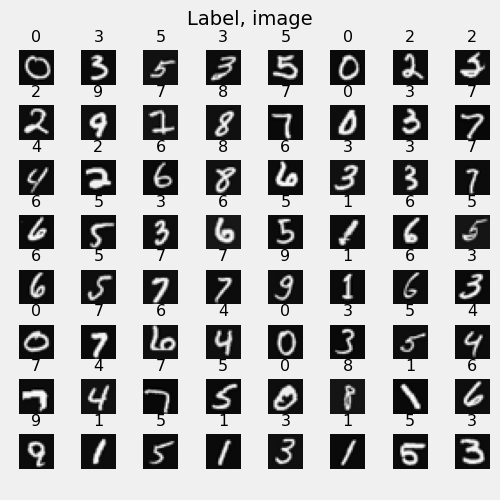

In [13]:
from google.colab import output
output.enable_custom_widget_manager()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)
plt.show()


<a name="2.3"></a>
### 2.3 Class Distribution Overview
Check the distribution of classes in the label vector y to understand if the dataset is balanced or imbalanced.

In [21]:
# Calculate the frequency of each category
unique_categories, counts = np.unique(y, return_counts=True)

# Calculate the percentage for each category
percentages = (counts / len(y)) * 100

# Print the results
for category, percentage in zip(unique_categories, percentages):
  print(f"Category {category}: {percentage:.2f}%")


Category 0: 10.00%
Category 1: 10.00%
Category 2: 10.00%
Category 3: 10.00%
Category 4: 10.00%
Category 5: 10.00%
Category 6: 10.00%
Category 7: 10.00%
Category 8: 10.00%
Category 9: 10.00%


<a name="3"></a>
## 3 - Neural Networks

Implemented a neural network model to perform multiclass classification on the image data.

The model consists of 3 layers:

- Two hidden layers with ReLU activation

- One output layer with linear activation

In the cells below:

- A custom model-building function is defined using Keras Tuner.

- Hyperparameters such as the number of units in each hidden layer, learning rate, and L2 regularization strength are tuned to optimize model performance.

- After tuning, the best model is retrained on the combined training and validation data before evaluating on the test set.

<a name="3.1"></a>
### 3.1 Split the Data

Splitting the dataset into training, validation, and   test sets.

In [19]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, stratify=y_trainval, random_state=42
)

<a name="3.2"></a>
### 3.2 Building the Neural Network Model
Define a neural network model with hyperparameters that can be tuned using Keras Tuner. In this setup:

In [36]:
def build_model(hp):
    model = Sequential()
    model.add(tf.keras.Input(shape=(400,)))

    # L2 regularization strength
    # l2_strength = hp.Float('l2_strength', min_value=1e-5, max_value=1e-2, sampling='LOG')
    l2_strength = hp.Choice('l2_strength', values=[1e-2, 1e-3, 1e-4])

    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=10, max_value=50, step=5)
    model.add(Dense(
        units=hp_units1,
        activation='relu',
        kernel_regularizer=regularizers.l2(l2_strength),
        name='L1')
    )

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=5, max_value=25, step=5)
    model.add(Dense(
        units=hp_units2,
        activation='relu',
        kernel_regularizer=regularizers.l2(l2_strength),
        name='L2')
    )

    model.add(Dense(10, activation='linear', name='L3'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics=['sparse_categorical_accuracy'] # Explicitly add the metric
    )
    return model

<a name="3.3"></a>
### 3.3 Hyperparameter Tuning

Find the best hyperparameters for neural network model.

In [37]:
tuner = kt.Hyperband(
       build_model,
       objective='val_sparse_categorical_accuracy',
       max_epochs=45,
       factor=3,
       directory='my_tuning_dir',
       project_name='digit_classifier',
       overwrite=True
   )

In [38]:
tuner.search(
       X_train, y_train,
       epochs=10,
       validation_data=(X_val, y_val)
   )

Trial 90 Complete [00h 00m 30s]
val_sparse_categorical_accuracy: 0.9037500023841858

Best val_sparse_categorical_accuracy So Far: 0.9437500238418579
Total elapsed time: 00h 13m 46s


<a name="3.4"></a>
### 3.4 Retrieve the best model configuration

In [39]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [40]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 35)             │        14,035 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,735 (57.56 KB)

 Trainable params: 14,735 (57.56 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
best_model.fit(X_trainval, y_trainval, epochs=50) # You might want to use more epochs here

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2352 - sparse_categorical_accuracy: 0.5935
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3490 - sparse_categorical_accuracy: 0.9039
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2602 - sparse_categorical_accuracy: 0.9273
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2149 - sparse_categorical_accuracy: 0.9455
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1856 - sparse_categorical_accuracy: 0.9541
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9651
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1649 - sparse_categorical_accuracy: 0.9601
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1911 - sparse_categorical_accuracy: 0.9559
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1321 - sparse_categorical_accuracy: 0.9757
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

<a name="3.5"></a>
### 3.5 Evaluating Model Performance

Evaluate the best model performance on the held-out test set.

In [43]:
y_pred_probs = best_model.predict(X_test) # probabilities of each class
y_pred = np.argmax(y_pred_probs, axis=1) # predicted labels

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Recall: 0.9360000000000002
Precision: 0.9360160882354205
F1-score: 0.9357075177554618
Accuracy: 0.936


Calculate accuracy for each category of test set

In [44]:
for category in np.unique(y_test):
    category_indices = np.where(y_test == category)[0]
    y_test_category = y_test[category_indices]
    y_pred_category = y_pred[category_indices]
    accuracy = accuracy_score(y_test_category, y_pred_category)
    print(f"Accuracy for category {category}: {accuracy}")

Accuracy for category 0: 1.0
Accuracy for category 1: 0.98
Accuracy for category 2: 0.92
Accuracy for category 3: 0.9
Accuracy for category 4: 0.94
Accuracy for category 5: 0.92
Accuracy for category 6: 0.99
Accuracy for category 7: 0.92
Accuracy for category 8: 0.91
Accuracy for category 9: 0.88


The model performs exceptionally well on digits like 0, 1, and 6, while 3 and 9 show slightly lower accuracy.

<a name="3.6"></a>
### 3.6 Check Misclassified Examples

Examine the test samples that were incorrectly classified.

Compared the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


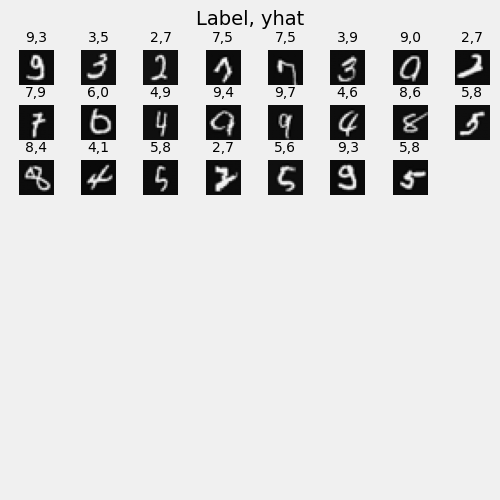

In [45]:
import math

f = best_model.predict(X_test)
yhat = np.argmax(f, axis=1)
doo = yhat != y_test[:,0]
idxs = np.where(yhat != y_test[:,0])[0]
X_err = X_test[doo]
y_err = y_test[doo]
yhat_err = yhat[doo]
m, n = X_err.shape

if len(idxs) == 0:
    print("no errors found")
else:
    cnt = min(30, 23)
    num_plots = min(cnt, len(idxs)) # Number of plots to display
    num_cols = math.ceil(num_plots / 8)  # Calculate columns, round up

    indices_to_plot = np.random.choice(len(idxs), size=num_plots, replace=False) # Indices without replacement

    fig, axes = plt.subplots(8, 8, figsize=(5, 5)) # Adjust the subplot grid if needed
    fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])
    widgvis(fig)

    for i, ax in enumerate(axes.flat):
        if i < num_plots:
            error_index = indices_to_plot[i] # Get the error index for this plot
            random_index = idxs[error_index] # Get the corresponding index in original dataset

            X_random_reshaped = X_test[random_index].reshape((20, 20)).T

            ax.imshow(X_random_reshaped, cmap='gray')
            ax.set_title(f"{y_test[random_index, 0]},{yhat[random_index]}", fontsize=10)
            ax.set_axis_off()
        else:
            ax.axis('off')  # Turn off extra axes

    fig.suptitle("Label, yhat", fontsize=14)

Some of the misclassified cases involve the digit '9', likely due to its visual similarity to other digits such as '0'."